In [6]:
import pandas as pd
import numpy as np
import sys
import os

import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "simple_white"
from plotly.subplots import make_subplots

import fig_utils

In [7]:
f = os.path.join('sl_results','28Aug22','1','starrydata_tc_bulk','starrydata_tc_bulk-1-211-23-0-10.csv')

ndme_traces = fig_utils.get_avg_and_std_trace(f, 'NDME', legend=False)
discovery_yield_traces = fig_utils.get_avg_and_std_trace(f, 'fraction_of_targets_found', legend=True)
discovery_probability_traces = (fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=True))
af1, tr1, DAF1 = fig_utils.get_DAF_heatmap_traces([f], n_targets=1)
af3, tr3, DAF3 = fig_utils.get_DAF_heatmap_traces([f], n_targets=3)
af5, tr5, DAF5 = fig_utils.get_DAF_heatmap_traces([f], n_targets=5)


arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
File:  sl_results/28Aug22/1/starrydata_tc_bulk/starrydata_tc_bulk-1-211-23-0-10.csv
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
arrary sliced: iterations > # of targets 21 21
{'EV': (47.3, 24.6), 'EI': (18.4, 11.8), 'MU': (6.9, 4.9), 'Random': (8.1, 7.2)}
0-10 {'EV': (0.2, 0.1), 'EI': (0.5, 0.3), 'MU': (1.4, 1.0), 'Random': (1.2, 1.1)}
{

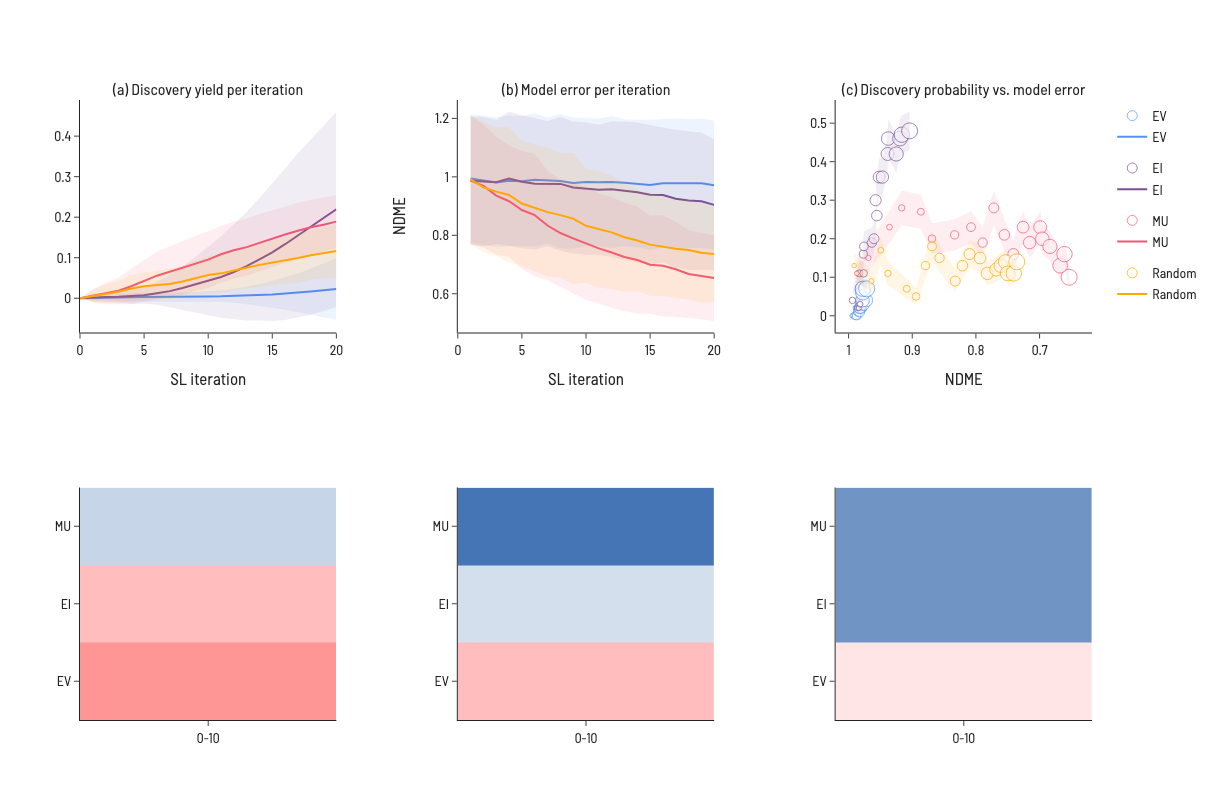

In [8]:
fig = make_subplots(
    rows=2, cols=3,
    # specs=[],
    # print_grid=True,
    # shared_xaxes=True,
    # vertical_spacing=0.1,
    horizontal_spacing=0.12,
    subplot_titles=['(a) Discovery yield per iteration',  '(b) Model error per iteration', '(c) Discovery probability vs. model error',
    '(d) $DAF_1$', '(e) $DAF_3$', '(f) $DAF_5$']
)

fig.add_trace(go.Heatmap(z=DAF1, x=tr1, y=af1, hoverongaps = False, coloraxis = "coloraxis", showlegend=False), row=2, col=1)
fig.add_trace(go.Heatmap(z=DAF3, x=tr3, y=af3, hoverongaps = False, coloraxis = "coloraxis", showlegend=False), row=2, col=2)
fig.add_trace(go.Heatmap(z=DAF5, x=tr5, y=af5, hoverongaps = False, coloraxis = "coloraxis", showlegend=False), row=2, col=3)

# calculate a custom colorscalce where the midpoint = white, low=red, high=blue
color_vals = np.array([DAF1+DAF3+DAF5])
c_min = color_vals.min()
c_max = color_vals.max()
midpoint_color = ((1-c_min)/(c_max-c_min))

custom_balance_r= [
    [0.0, 'rgb(255, 150, 150)'],
    [midpoint_color, 'rgb(255,255,255)'],
    [1, 'rgb(69,117,180)']]

fig.update_layout(coloraxis = {'colorscale':custom_balance_r, 'colorbar':{'tickvals':[0,0.5,1,2.5,5], 'title':'<i>DAF<sub>n</sub></i>'}})
fig.update_layout(xaxis_showticklabels=True)
fig.update(layout_coloraxis_showscale=False)

fig.update_layout(coloraxis_colorbar=dict(
#     lenmode="pixels", 
    len=1,
))

for trace in discovery_yield_traces:
    fig.add_trace(trace, row=1, col=1)

for trace in ndme_traces:
    fig.add_trace(trace, row=1, col=2)

for trace in discovery_probability_traces:
    fig.add_trace(trace, row=1, col=3)

fig.update_xaxes(title_text='SL iteration', row=1, col=1)
fig.update_xaxes(title_text='SL iteration', row=1, col=2)
fig.update_xaxes(title_text='NDME', autorange='reversed', row=1, col=3)
fig.update_yaxes(title_text='$DY_n$', row=1, col=1)
fig.update_yaxes(title_text='NDME', row=1, col=2)
fig.update_yaxes(title_text='$DP_n$', row=1, col=3)

fig.update_layout(font=dict(family="Barlow Semi Condensed", size=14), width=1000, height=800,  showlegend=True)
fig.show()